In [2]:
from typing_extensions  import TypedDict
from langgraph.graph  import  StateGraph,START,END

from typing import Annotated
from langgraph.graph.message import add_messages

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [3]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
    

In [12]:
from langchain_groq import ChatGroq
from IPython.display import Image, display

llm_groq=ChatGroq(model="openai/gpt-oss-20b")


llm_groq.invoke("hi")

AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "hi". They are greeting. We should respond politely. Probably ask how can help.'}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 72, 'total_tokens': 114, 'completion_time': 0.037734322, 'prompt_time': 0.004607575, 'queue_time': 0.047231725, 'total_time': 0.042341897}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_59f77feedf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8ff3eacc-887e-43a6-a7d6-9564ec5273f2-0', usage_metadata={'input_tokens': 72, 'output_tokens': 42, 'total_tokens': 114})

In [11]:
def superbot(state:State):
    messages=state['messages']
    response=llm_groq.invoke(messages)
    return {messages:response}

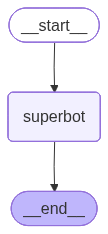

In [13]:
graph=StateGraph(State)
graph.add_node("superbot",superbot)
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)
graph_builder=graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

hi
